### Question 5
Using Iris data, plot the following with proper legend and axis labels: (Download IRIS data from: https://archive.ics.uci.edu/ml/datasets/iris or import it from sklearn datasets) \
a. Load data into pandas’ data frame. Use pandas.info () method to look at the info on datatypes in the dataset. \
b. Find the number of missing values in each column (Check number of null values in a column using df.isnull().sum()) \
c. Plot bar chart to show the frequency of each class label in the data. \
d. Draw a scatter plot for Petal Length vs Sepal Length and fit a regression line \
e. Plot density distribution for feature Petal width. \
f. Use a pair plot to show pairwise bivariate distribution in the Iris Dataset. \
g. Draw heatmap for any two numeric attributes \
h. Compute mean, mode, median, standard deviation, confidence interval and standard error for  each numeric feature \
i. Compute correlation coefficients between each pair of features and plot heatmap

In [2]:
#  pip install scikit_learn
# pip install seaborn

from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data=load_iris(as_frame=True)
X, y=data.data, data.target
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

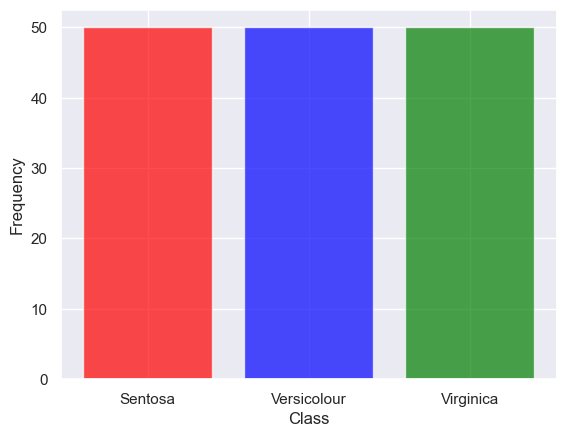

In [5]:
ax=plt.axes()
ax.bar(['Sentosa', 'Versicolour', 'Virginica'], y.value_counts(), color=['red', 'blue', 'green'], alpha=0.7)
ax.set_xlabel('Class')
ax.set_ylabel('Frequency');

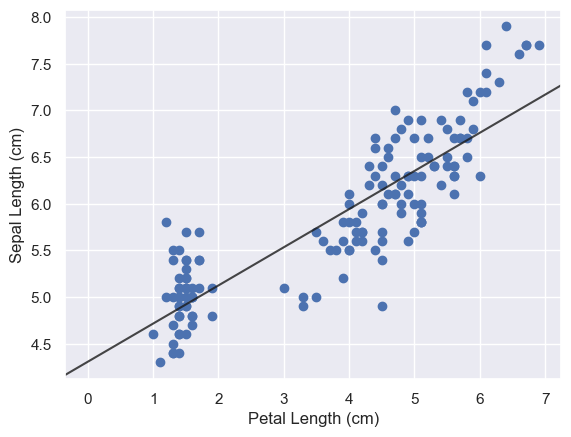

In [6]:
ax=plt.axes()
reg=LinearRegression()
reg.fit(X['petal length (cm)'].to_numpy().reshape(-1, 1), X['sepal length (cm)'])
ax.scatter(X['petal length (cm)'], X['sepal length (cm)'])
ax.axline((0, reg.intercept_), slope=reg.coef_[0], color='k', alpha =0.8)
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Sepal Length (cm)');

<Axes: ylabel='Density'>

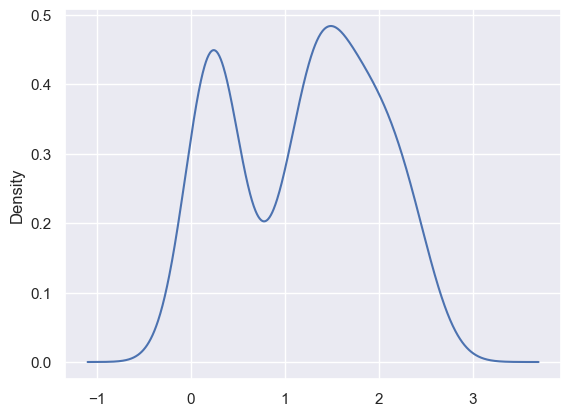

In [7]:
X['petal width (cm)'].plot.density()

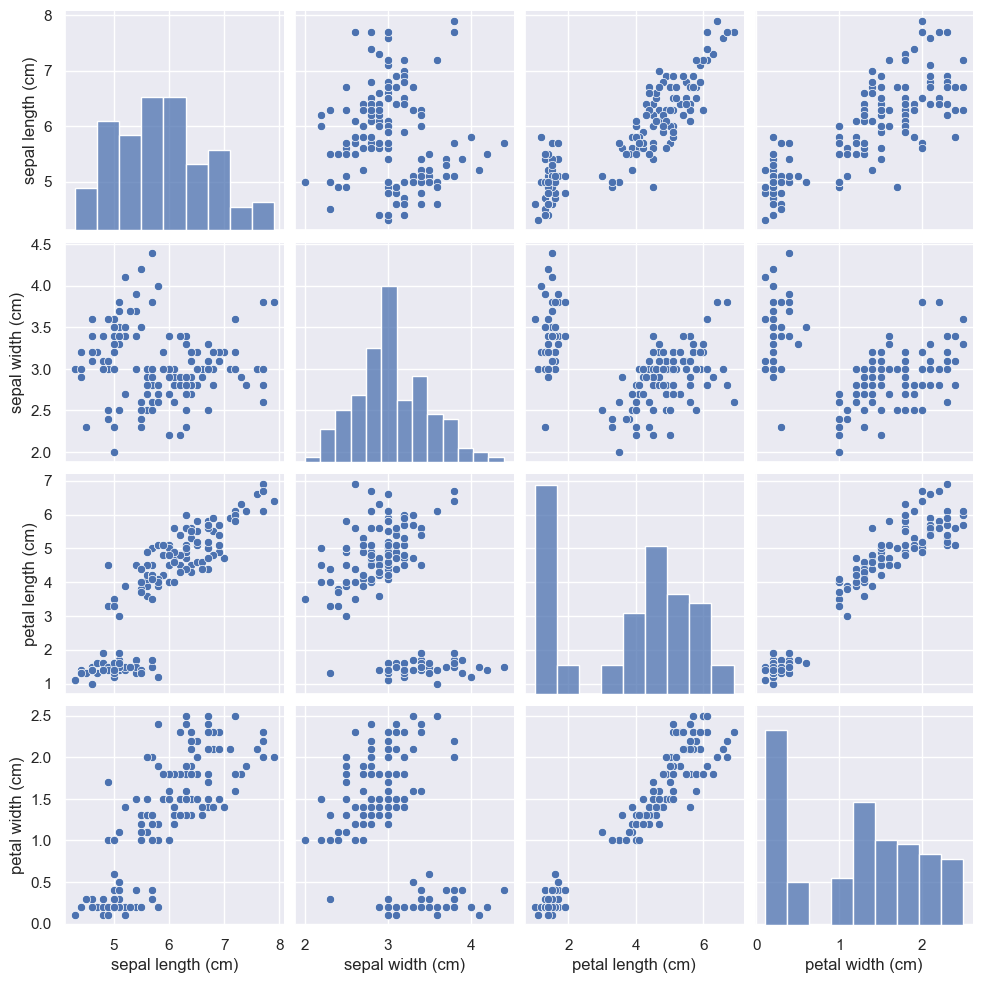

In [8]:
sns.pairplot(X);

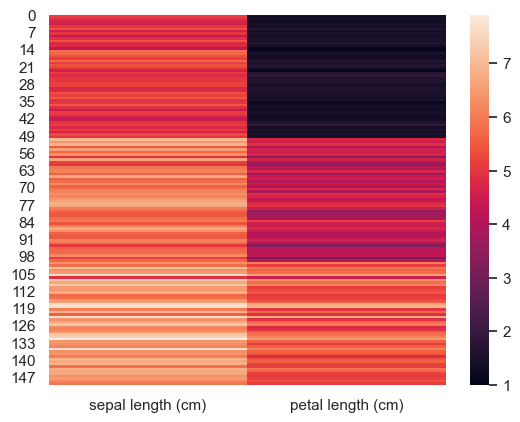

In [9]:
sns.heatmap(X[['sepal length (cm)', 'petal length (cm)']]);

In [10]:
means=X.mean(numeric_only=True)
modes=X.mode(numeric_only=True).loc[0]
medians=X.median(numeric_only=True)
stand_dev=X.std(numeric_only=True)
std_errs=stand_dev/(len(X)**0.5)

def create_confidence(row):
    return pd.Interval(row['mean']-1.96*row['std_error'], 
                       row['mean']+1.96*row['std_error'], closed='both')

descriptive=pd.DataFrame({'mean': means, 'mode': modes, 'median': medians,
                          'std': stand_dev, 'std_error': std_errs})
descriptive['confidence']=descriptive.apply(create_confidence, axis=1)
descriptive

,mean,mode,median,std,std_error,confidence
sepal length (cm),5.843333,5.0,5.80,0.828066,0.067611,"[5.710815153527241, 5.9758515131394265]"
sepal width (cm),3.057333,3.0,3.00,0.435866,0.035588,"[2.987580200380407, 3.1270864662862605]"
petal length (cm),3.758000,1.4,4.35,1.765298,0.144136,"[3.475493445532275, 4.040506554467726]"
petal width (cm),1.199333,0.2,1.30,0.762238,0.062236,"[1.0773499010234868, 1.3213167656431803]"


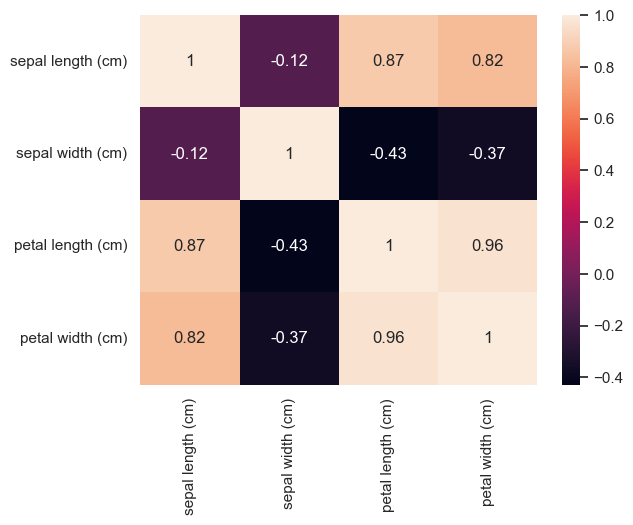

In [11]:
sns.heatmap(X.corr(), annot=True);